In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Overall

In [18]:

# LOAD DATA
with open('embedding_model_results.json', 'r') as f:
    data = json.load(f)

In [19]:
model_averages = []

In [20]:
import pandas as pd

# Helper function to handle both lists and single values
def get_single_value(value):
    # If the value is a list, return the first element or its average if needed
    if isinstance(value, list):
        return sum(value) / len(value) if len(value) > 0 else 0
    # Otherwise, return the value itself
    return value

# Assume data is your input dictionary and model_averages is an empty list
model_averages = []

for model_name, metrics in data.items():
    # Initialize accumulators for each metric
    total_accuracy = 0
    total_sensitivity = 0
    total_specificity = 0
    total_time = 0
    count = 0  # To keep track of the number of labels

    # Iterate through each label (e.g., 'No Finding', 'Cardiomegaly', etc.)
    for label, stats in metrics.items():
        # Use the helper function to handle single values or lists
        accuracy_value = get_single_value(stats.get('accuracy', 0))
        sensitivity_value = get_single_value(stats.get('sensitivity', 0))
        specificity_value = get_single_value(stats.get('specificity', 0))
        time_value = get_single_value(stats.get('time', 0))  # Time values seem to be already flat

        # Add to the totals
        total_accuracy += accuracy_value
        total_sensitivity += sensitivity_value
        total_specificity += specificity_value
        total_time += time_value

        count += 1

    # Compute the average metrics across all labels for this model
    if count > 0:
        avg_accuracy = total_accuracy / count
        avg_sensitivity = total_sensitivity / count
        avg_specificity = total_specificity / count
        avg_time = total_time / count

        # Append the averages to the list
        model_averages.append({
            'model': model_name,
            'accuracy': avg_accuracy,
            'sensitivity': avg_sensitivity,
            'specificity': avg_specificity,
            'time': avg_time
        })

# Convert the list into a pandas DataFrame
df = pd.DataFrame(model_averages)

# Create separate box plots for each metric (accuracy, sensitivity, specificity, time)
metrics = ['accuracy', 'sensitivity', 'specificity', 'time']

# Now you can continue with your plotting or further processing.


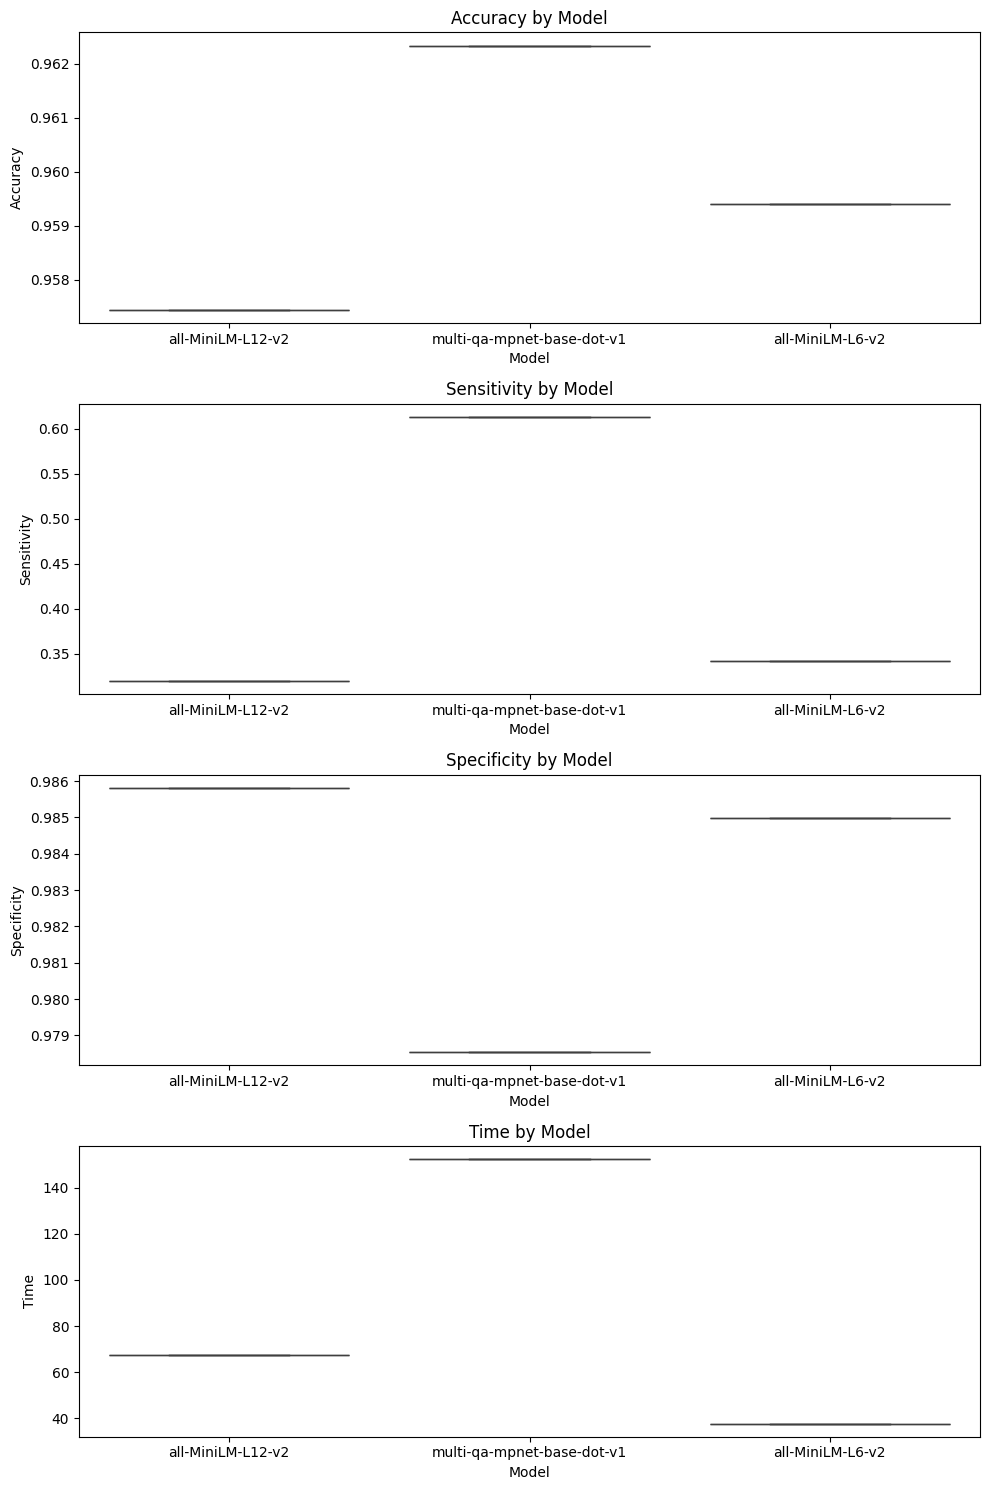

In [21]:

# Set up the figure with subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), figsize=(10, 15))

# Generate a box plot for each metric on a separate axis
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x='model', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Model')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel('Model')

# Adjust the layout
plt.tight_layout()
plt.show()

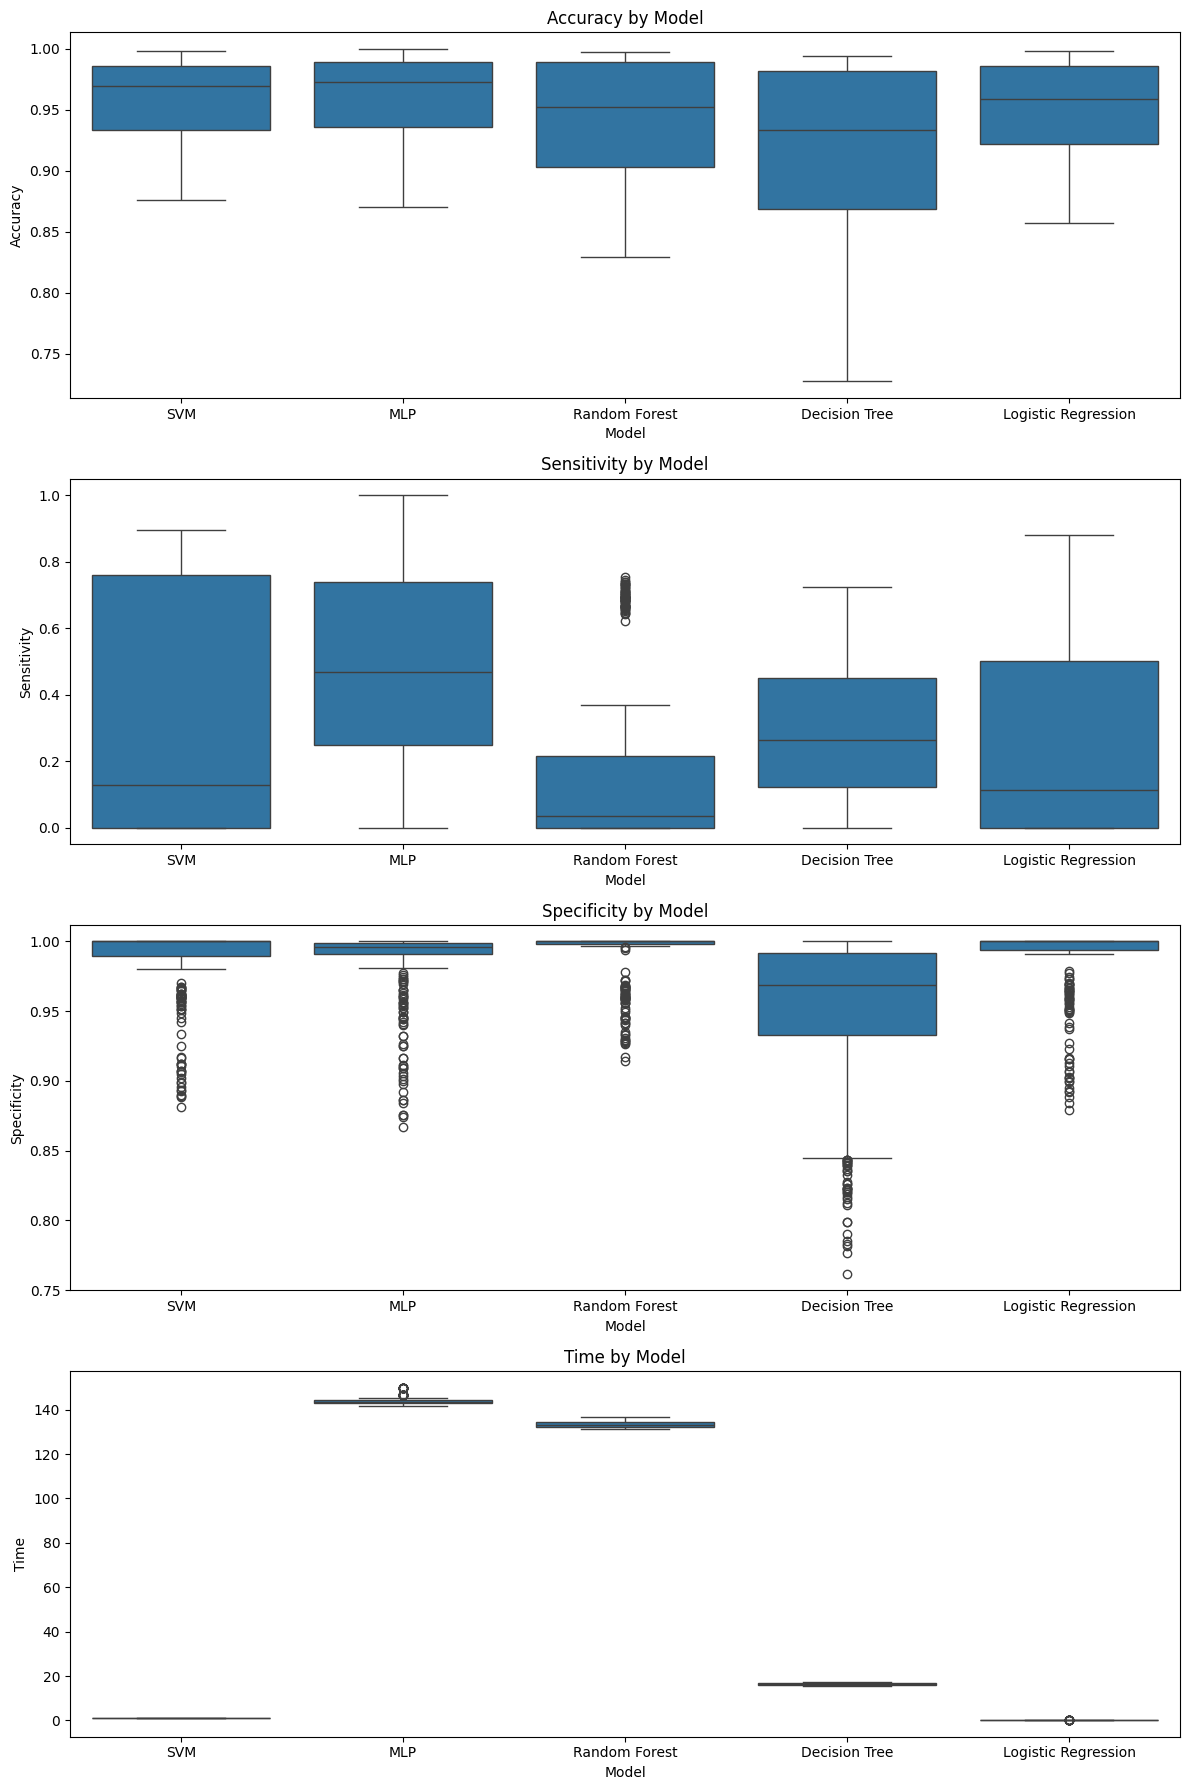

In [23]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the JSON file with performance details
with open('combined_learning_model_results.json', 'r') as f:
    data = json.load(f)

# Initialize a list to store the average performance values for each model
model_averages = []

# Helper function to ensure we handle both floats and lists
def get_values_as_list(value):
    if isinstance(value, list):
        return value
    return [value]  # If it's a single float, convert it to a list

# Iterate through each model in the JSON data
for model_name, metrics in data.items():
    # Initialize accumulators for each metric
    total_accuracy = []
    total_sensitivity = []
    total_specificity = []
    total_time = []
    
    # Iterate through each label (e.g., 'No Finding', 'Cardiomegaly', etc.)
    for label, stats in metrics.items():
        # Handling floats or lists for each metric
        accuracy_values = get_values_as_list(stats.get('accuracy', 0))
        sensitivity_values = get_values_as_list(stats.get('sensitivity', 0))
        specificity_values = get_values_as_list(stats.get('specificity', 0))
        time_values = get_values_as_list(stats.get('time', 0))  # Time values seem to be already flat

        # Extend the total lists with values for each label
        total_accuracy.extend(accuracy_values)
        total_sensitivity.extend(sensitivity_values)
        total_specificity.extend(specificity_values)
        total_time.extend(time_values)

    # Store the collected values for this model
    model_averages.append({
        'model': model_name,
        'accuracy': total_accuracy,
        'sensitivity': total_sensitivity,
        'specificity': total_specificity,
        'time': total_time
    })

# Prepare a DataFrame for each metric for Seaborn visualization
metrics_to_plot = ['accuracy', 'sensitivity', 'specificity', 'time']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics_to_plot), figsize=(12, 18))

# Plotting each metric
for i, metric in enumerate(metrics_to_plot):
    plot_data = []
    model_labels = []

    # Collect data for each model for the current metric
    for model_data in model_averages:
        if len(model_data[metric]) > 0:  # Check if the metric has values
            plot_data.extend(model_data[metric])
            model_labels.extend([model_data['model']] * len(model_data[metric]))

    # Create a box plot for the current metric
    sns.boxplot(x=model_labels, y=plot_data, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Model')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric.capitalize())

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# SVM Specific Viz

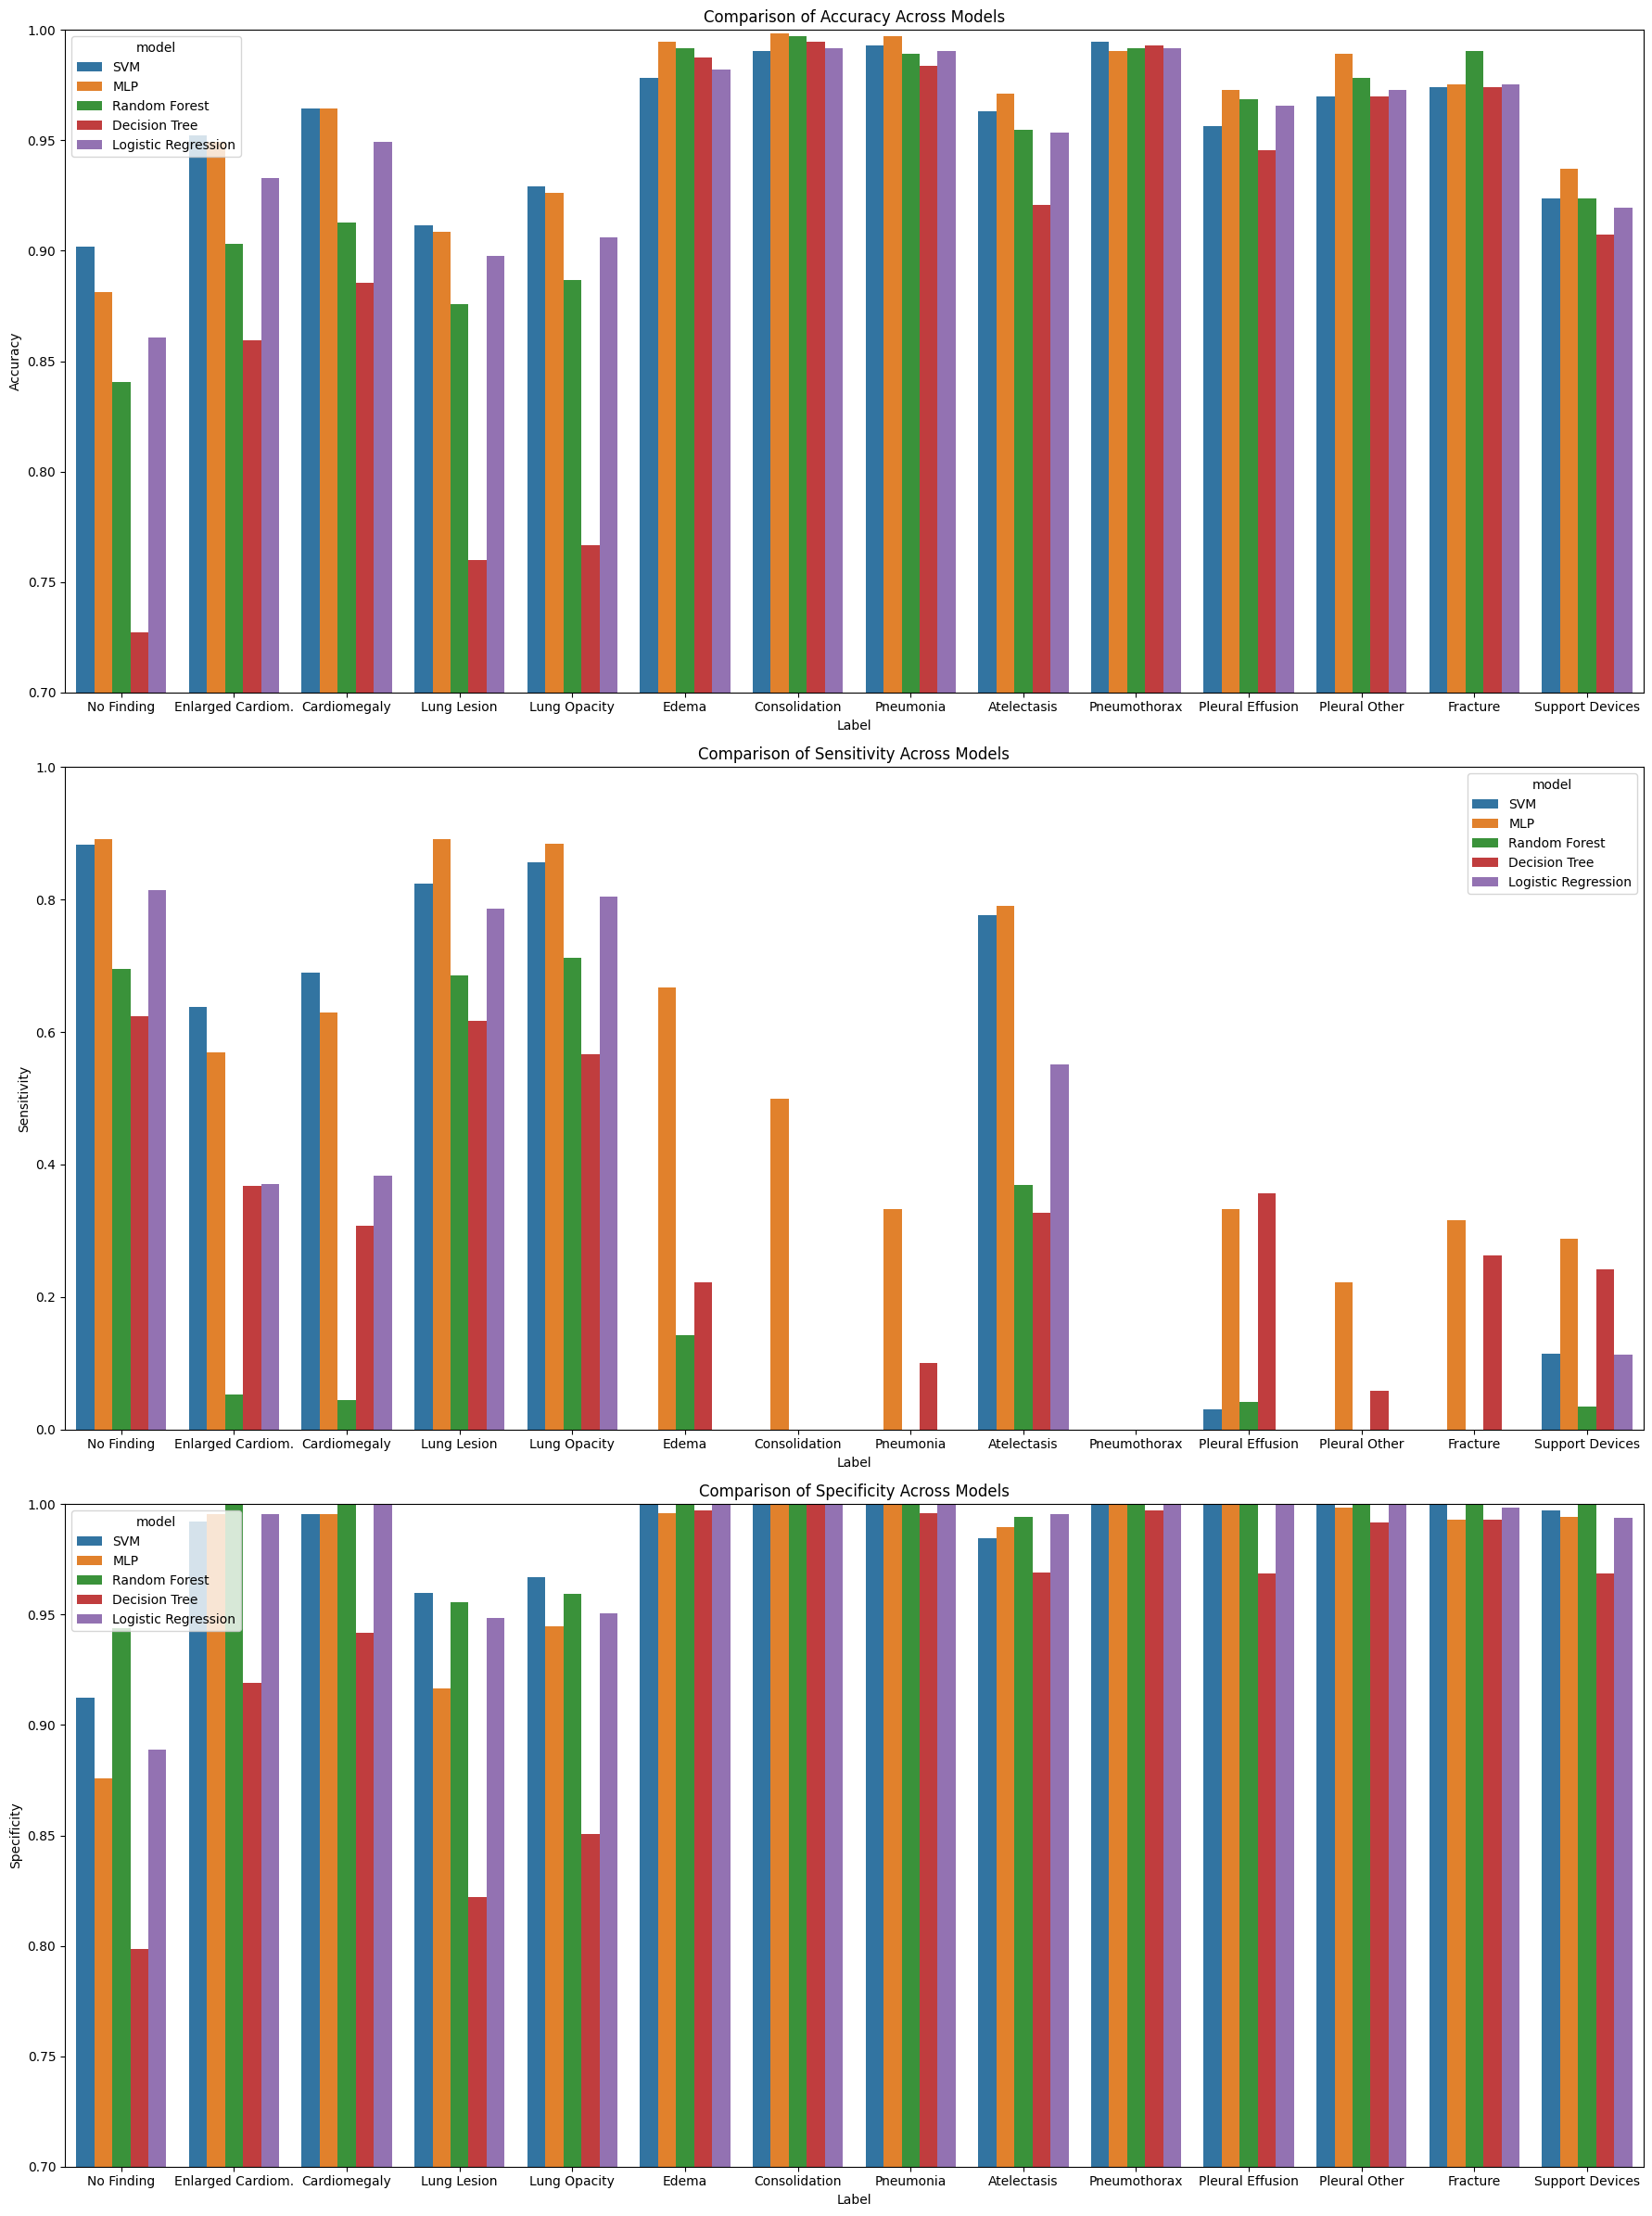

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON files with performance data
with open('learning_model_results.json', 'r') as f:
    svm_data = json.load(f)
    
with open('additional_learning_model_results.json', 'r') as f:
    additional_data = json.load(f)

# Combine the data from both JSONs into a single dictionary
all_model_data = {**svm_data, **additional_data}

# Labels of interest based on SVM's superior performance
labels_of_interest = ['No Finding', 'Enlarged Cardiom.', 'Cardiomegaly', 'Lung Lesion', 'Lung Opacity', 'Edema', 
                      'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
                      'Pleural Other', 'Fracture', 'Support Devices']

# Initialize a list to store the processed data
model_performance = []

# Extract accuracy, sensitivity, and specificity for each label and model
for model_name, model_metrics in all_model_data.items():
    for label in labels_of_interest:
        if label in model_metrics:
            accuracy = [sum(x) / len(x) for x in model_metrics[label].get('accuracy', [[0]])][0]  # Average accuracy
            sensitivity = [sum(x) / len(x) for x in model_metrics[label].get('sensitivity', [[0]])][0]  # Average sensitivity
            specificity = [sum(x) / len(x) for x in model_metrics[label].get('specificity', [[0]])][0]  # Average specificity

            # Append the results for this model and label
            model_performance.append({
                'label': label,
                'model': model_name,
                'accuracy': accuracy,
                'sensitivity': sensitivity,
                'specificity': specificity
            })

# Convert to DataFrame
df = pd.DataFrame(model_performance)

# Plot separate bar charts for accuracy, sensitivity, and specificity
metrics = ['accuracy', 'sensitivity', 'specificity']

# Set up the figure and axes for separate plots
fig, axes = plt.subplots(nrows=len(metrics), figsize=(18, 24))  # Increase height for better readability

# Loop over each metric and create a bar plot
for i, metric in enumerate(metrics):
    sns.barplot(x='label', y=metric, hue='model', data=df, ax=axes[i], errorbar=None)
    axes[i].set_title(f'Comparison of {metric.capitalize()} Across Models')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(metric.capitalize())
    
    # Adjust y-axis for sensitivity to make it longer
    if metric == 'sensitivity':
        axes[i].set_ylim(0.0, 1.0)  # Sensitivity will have a wider range from 0.0 to 1.0
    else:
        axes[i].set_ylim(0.7, 1.0)  # For accuracy and specificity, use 0.7 to 1.0

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()
